In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2

In [2]:
IMG_PATH= '../Nepal_landslide_dataset/Training/image'
MASK_PATH='../Nepal_landslide_dataset/Training/label'
img_path_list=list() 
mask_path_list = list() 
for img_name in os.listdir(IMG_PATH):
    img_path_list.append(os.path.join(IMG_PATH,img_name))
    mask_path_list.append(os.path.join(MASK_PATH,img_name.replace('b_','').replace('.tiff','_mask.png')))


In [3]:
# Draw
def visualize_for_paper(img_path_list:list[str],mask_path_list:list[str])->None:
    """
    Draw image for paper
    ### Arguments:
        img_path_list(list[str]): List of all images
        mask_path_list(list[str]): List of masks 
    ### Returns:
        None but display 6x6 random image with red boundary 
    """
    rnd_idxs = np.arange(len(img_path_list))
    np.random.shuffle(rnd_idxs)
    rows,cols  = (8,8)
    # Create a figure
    fig = plt.figure(figsize=(10, 10))
    # Create a GridSpec with 2 rows and 2 columns
    gs = fig.add_gridspec(rows,cols, wspace=0.1, hspace=0.1)
    plt.figure(figsize=(500,500))
    for r in range(rows):
        for c in range(cols):
            idx = r*rows+c 
            # img_path = os.path.join(IMG_LANDSLIDE_PATH,img_path_list[idx])
            # boundary_path = os.path.join(BOUNDARY_LANDSLIDE_PATH,boundary_path_list[idx])
            print('img',img_path_list[idx],'mask',mask_path_list[idx])
            img = cv2.imread(img_path_list[idx])
            mask = cv2.imread(mask_path_list[idx],cv2.IMREAD_GRAYSCALE)
            binary_image= np.clip(mask,0,1,dtype=np.uint8)
            # cv2.CHAIN_APPROX_SIMPLE: compresses horizontal, vertical, and diagonal segments and leaves only their end points
            contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
            img = cv2.resize(img,(128,128))
            img = img.astype(np.uint8)
            ax = fig.add_subplot(gs[r,c])
            ax.axis('off')
            ax.imshow(img)

    plt.tight_layout() 
    plt.show() 





img ../Nepal_landslide_dataset/Training/image/b_COMP_21_45.tiff mask ../Nepal_landslide_dataset/Training/label/COMP_21_45_mask.png
img ../Nepal_landslide_dataset/Training/image/b_COMP_14_27.tiff mask ../Nepal_landslide_dataset/Training/label/COMP_14_27_mask.png
img ../Nepal_landslide_dataset/Training/image/b_COMP_11_68.tiff mask ../Nepal_landslide_dataset/Training/label/COMP_11_68_mask.png
img ../Nepal_landslide_dataset/Training/image/b_COMP_8_18.tiff mask ../Nepal_landslide_dataset/Training/label/COMP_8_18_mask.png
img ../Nepal_landslide_dataset/Training/image/b_COMP_8_2.tiff mask ../Nepal_landslide_dataset/Training/label/COMP_8_2_mask.png
img ../Nepal_landslide_dataset/Training/image/b_COMP_10_25.tiff mask ../Nepal_landslide_dataset/Training/label/COMP_10_25_mask.png
img ../Nepal_landslide_dataset/Training/image/b_COMP_9_4.tiff mask ../Nepal_landslide_dataset/Training/label/COMP_9_4_mask.png
img ../Nepal_landslide_dataset/Training/image/b_COMP_9_19.tiff mask ../Nepal_landslide_datase

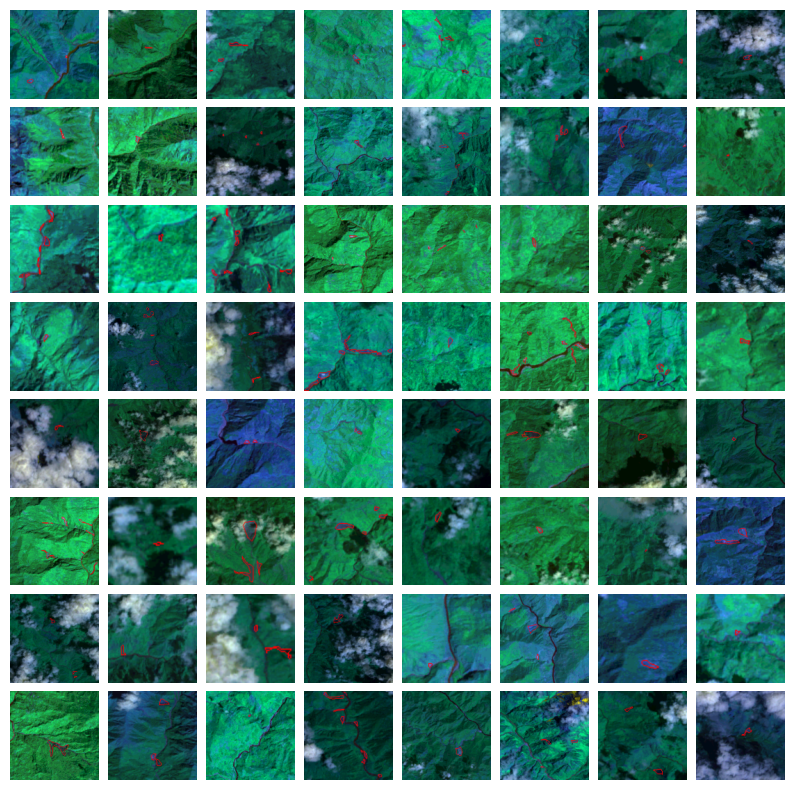

<Figure size 50000x50000 with 0 Axes>

In [4]:
visualize_for_paper(img_path_list=img_path_list,mask_path_list=mask_path_list)